In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('new_result/all_concat.csv')
data

,Unnamed: 0,date,review,rating,title,platform,thumbs_up_count,review_version,app_version,app
0,0,2023-02-16 16:47:48,"Fantastic app, it changed my way to workout in...",5,"Amazing app, some improvements needed",AppStore,NaN,NaN,NaN,duoswim
1,1,2023-12-01 18:08:43,Brilliant app which not only looks great but w...,5,Highly recommend,AppStore,NaN,NaN,NaN,duoswim
2,2,2023-01-14 18:32:17,Positive: The coaching side seems ok and decen...,2,"Watch app is very limited, integration apple f...",AppStore,NaN,NaN,NaN,duoswim
3,3,2022-06-12 10:13:29,Finally a swim app that looks great and provid...,5,A brilliant app,AppStore,NaN,NaN,NaN,duoswim
4,4,2022-06-11 19:02:41,This app is very easy to use. I love how you c...,5,Great for all swimmers!,AppStore,NaN,NaN,NaN,duoswim
...,...,...,...,...,...,...,...,...,...,...
1910,1910,2020-02-17 07:20:49,"Great app! Simple as it is, works good for beg...",5,Easy-peasy app,AppStore,NaN,NaN,NaN,swimup
1911,1911,2023-05-04 14:25:04,They put me on 2 levels before champion but th...,2,Honest oppinion of a 17 year old on a swim team,AppStore,NaN,NaN,NaN,swimup
1912,1912,2021-10-04 01:08:58,Thank you guys. Appreciate your work.,5,Great App.,AppStore,NaN,NaN,NaN,swimup
1913,1913,2021-08-01 05:34:55,I love Swimup’s YouTube channel so I was reall...,3,"I really want to like the app, I really do",AppStore,NaN,NaN,NaN,swimup


In [3]:
data.describe()

,Unnamed: 0,rating,thumbs_up_count
count,1915.000000,1915.000000,1076.000000
mean,957.000000,3.140470,1.920074
std,552.957201,1.726796,4.156377
min,0.000000,1.000000,0.000000
25%,478.500000,1.000000,0.000000
50%,957.000000,3.000000,0.000000
75%,1435.500000,5.000000,2.000000
max,1914.000000,5.000000,59.000000


In [5]:
functions = ['devices connect', 'nutrition', 'smart devices', 'easy to use', 'community', 'analyze, overview', 'customer', 'customized', 'coach', 'track', 'video', 'goggles']
keywords = ['connect', 'nutrition', 'smart', 'easy', 'community', 'analyze', 'customer', 'custom', 'coach', 'track', 'video', 'goggles']

In [15]:
kw_df = pd.DataFrame(columns=keywords)
for kw in keywords:
    kw_df[kw] = data['review'].where(data['review'].str.contains(kw), other=pd.NA)
kw_df.to_csv('new_result/keywords.csv', index=False)

In [16]:
for kw in keywords:
    print(kw, kw_df[kw].count())

connect 73
nutrition 4
smart 28
easy 80
community 12
analyze 3
customer 46
custom 80
coach 68
track 233
video 103
goggles 78


## preprocessing

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # 如果你需要分詞

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/morris/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/morris/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
df_reviews = data['review']
type(df_reviews)

pandas.core.series.Series

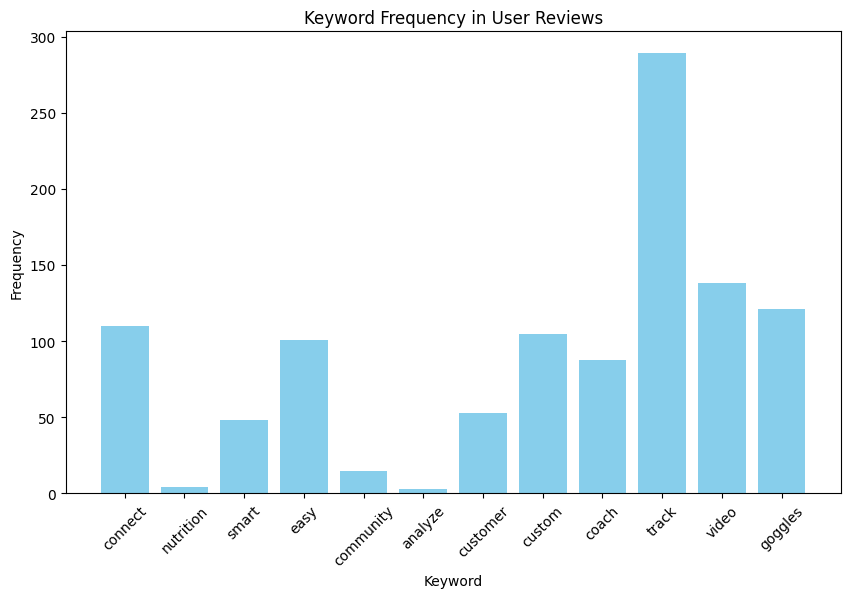

In [31]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import string

# 假设 data 是一个 DataFrame，并且 'review' 是其中的一列
# 处理 'review' 列以确保所有数据都是字符串类型
df_reviews = data['review'].fillna('')  # 用空字符串替换 NaN 值
cleaned_reviews = df_reviews.astype(str).str.lower().apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# 合并所有评论成一个长字符串，以便进行关键字频率计算
all_reviews_combined = ' '.join(cleaned_reviews)

# 定义一组关键字进行分析
keywords = ['connect', 'nutrition', 'smart', 'easy', 'community', 'analyze', 'customer', 'custom', 'coach', 'track', 'video', 'goggles']

# 计算每个关键字的出现次数
keyword_counts = {keyword: all_reviews_combined.count(keyword) for keyword in keywords}

# 进行视觉化
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='skyblue')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Keyword Frequency in User Reviews')
plt.xticks(rotation=45)
plt.show()